# Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pint import UnitRegistry
import numpy as np

ureg = UnitRegistry()

# Constants

In [44]:
# Load the Excel file
# Replace with the actual path to your Excel file
FILEPATH = r"../data/literature_data.xlsx"
OUTPUT_FILEPATH = r"../img/output/"

MELTING_SHEETNAME = "melting" 
# Replace with the actual sheet name
THERMAL_COEFFICIENT_SHEETNAME = "thermal expansion coefficient"
HEAT_CAPACITY_SHEETNAME = "heat capacity"

In [71]:
# Define only filled markers
mymarker = ['o', 's', 'D', '^', 'v', '>', '<', 'p', 'h', '*']

# Define custom colors (normalized, excluding white)
CUSTOMCOLORS = np.array([
    [0, 0, 0], [112, 48, 160], [192, 0, 0], [1, 175, 146], [222, 110, 38],
    [0, 0, 255], [150, 150, 150], [95, 58, 91], [72, 113, 57], [27, 71, 116],
    [222, 110, 38], [139, 44, 42], [0, 200, 0], [255, 0, 240], [92, 103, 177],
    [71, 30, 118], [100, 200, 0], [239, 144, 42], [120, 100, 255], [55, 200, 80],
    [200, 20, 150], [25, 105, 88], [88, 10, 198], [100, 55, 241], [254, 120, 62],
    [165, 158, 171], [224, 21, 138], [
        155, 100, 8], [84, 184, 93], [193, 233, 41],
    [250, 199, 64], [200, 175, 41], [127, 217, 16], [255, 0, 0], [0, 0, 255],
    [95, 58, 91], [72, 113, 57], [27, 71, 116], [222, 110, 38], [139, 44, 42],
    [0, 200, 0], [255, 0, 240], [92, 103, 177], [71, 30, 118], [100, 200, 0],
    [239, 144, 42], [120, 100, 255], [
        55, 200, 80], [200, 20, 150], [25, 105, 88],
    [88, 10, 198], [100, 55, 241], [254, 120, 62], [
        165, 158, 171], [224, 21, 138],
    [155, 100, 8], [84, 184, 93], [193, 233, 41], [250, 199, 64], [200, 175, 41],
    [127, 217, 16]
]) / 256  # Normalize to range [0,1]

CUSTOMMARKERS = ['o', 's', 'D', '^', 'v', '>', '<', 'p', 'h', '*']

# Reading

In [63]:
# Read the Excel file into a DataFrame
melting_data = pd.read_excel(FILEPATH, sheet_name=MELTING_SHEETNAME, header=1)
thermalcoefficient_data = pd.read_excel(
    FILEPATH, sheet_name=THERMAL_COEFFICIENT_SHEETNAME, header=1)
heat_capacity_data = pd.read_excel(
    FILEPATH, sheet_name=HEAT_CAPACITY_SHEETNAME, header=1)



In [ ]:
# Display the first few rows to understand the melting_data
# Data cleaning and preparation
melting_data = melting_data.drop(melting_data.columns[0], axis=1)
# data = data.dropna()  # Drop rows with missing values
melting_data['Temperature_Kelvin'] = pd.to_numeric(
    melting_data['Temperature_Kelvin'], errors='coerce')
melting_data['Pressure_atm'] = pd.to_numeric(
    melting_data['Pressure_atm'], errors='coerce')
display(melting_data)

,year,author,gas,Temperature_Kelvin,Pressure_Mpa,Pressure_atm,Pressure_bar,Pressure_kbar,Pressure_kg/cm2,Pressure_katm,Pressure_Gpa
0,1962,Michels,krypton,115.893,NaN,5.500,NaN,NaN,NaN,NaN,NaN
1,1962,Michels,krypton,116.352,NaN,20.720,NaN,NaN,NaN,NaN,NaN
2,1962,Michels,krypton,116.690,NaN,41.010,NaN,NaN,NaN,NaN,NaN
3,1962,Michels,krypton,118.198,NaN,81.560,NaN,NaN,NaN,NaN,NaN
4,1962,Michels,krypton,119.069,NaN,110.520,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
168,1940,Clusius,xenon,162.020,NaN,17.600,NaN,NaN,NaN,NaN,NaN
169,1940,Clusius,xenon,162.010,NaN,17.100,NaN,NaN,NaN,NaN,NaN
170,1940,Clusius,xenon,161.640,NaN,7.800,NaN,NaN,NaN,NaN,NaN
171,1940,Clusius,xenon,161.630,NaN,7.200,NaN,NaN,NaN,NaN,NaN


In [ ]:
thermalcoefficient_data = thermalcoefficient_data.drop(
    thermalcoefficient_data.columns[0], axis=1)

display(thermalcoefficient_data)

,year,author,gas,Temperature_Kelvin,Pressure_atm,Pressure_kbars,Alpha_Kelvin^-1
0,1971,Stavely,krypton,120.0,5.0,NaN,3119.00000
1,1971,Stavely,krypton,130.0,5.0,NaN,3411.00000
2,1971,Stavely,krypton,140.0,5.0,NaN,3810.00000
3,1971,Stavely,krypton,120.0,10.0,NaN,3101.00000
4,1971,Stavely,krypton,130.0,10.0,NaN,3386.00000
...,...,...,...,...,...,...,...
212,1963,Packard,xenon,50.0,NaN,0.65,0.00062
213,1963,Packard,xenon,75.0,NaN,1.16,0.00077
214,1963,Packard,xenon,100.0,NaN,1.65,0.00070
215,1963,Packard,xenon,125.0,NaN,2.06,0.00084


In [64]:

def cal_to_joules(heat_capacity_cal):
    return heat_capacity_cal*4.184

def convert_heat_capacity(data):
    data['cal_to_joules'] = data['cp_cal/mol/deg'].apply(
        lambda x: cal_to_joules(x) if pd.notnull(x) else None)
    data['millijoules_to_joules'] = data['cp_mJ/mol/K'].apply(
        lambda x: x * 1000 if pd.notnull(x) else None)

    data['cp_J/mol/K'] = data['cp_J/mol/K'].combine_first(
        data['cal_to_joules']).combine_first(data['millijoules_to_joules'])
    return data


In [65]:
heat_capacity_data = heat_capacity_data.drop(
    heat_capacity_data.columns[0], axis=1)
display(heat_capacity_data)

,year,author,gas,Temperature_Kelvin,cp_J/mol/K,cp_cal/mol/deg,cp_mJ/mol/K,cp_Ws/mol/deg
0,1969,Finegold,krypton,4.6496,NaN,NaN,688.7,NaN
1,1969,Finegold,krypton,5.1110,NaN,NaN,942.5,NaN
2,1969,Finegold,krypton,5.5990,NaN,NaN,1263.0,NaN
3,1969,Finegold,krypton,5.9839,NaN,NaN,1552.0,NaN
4,1969,Finegold,krypton,6.2566,NaN,NaN,1775.0,NaN
...,...,...,...,...,...,...,...,...
273,1963,Packard,xenon,50.0000,NaN,6.00,NaN,NaN
274,1963,Packard,xenon,75.0000,NaN,6.39,NaN,NaN
275,1963,Packard,xenon,100.0000,NaN,6.74,NaN,NaN
276,1963,Packard,xenon,125.0000,NaN,7.30,NaN,NaN


In [66]:
heat_capacity_data_2 = convert_heat_capacity(heat_capacity_data)
display(heat_capacity_data_2)

,year,author,gas,Temperature_Kelvin,cp_J/mol/K,cp_cal/mol/deg,cp_mJ/mol/K,cp_Ws/mol/deg,cal_to_joules,millijoules_to_joules
0,1969,Finegold,krypton,4.6496,6.887000e+05,NaN,688.7,NaN,NaN,688700.0
1,1969,Finegold,krypton,5.1110,9.425000e+05,NaN,942.5,NaN,NaN,942500.0
2,1969,Finegold,krypton,5.5990,1.263000e+06,NaN,1263.0,NaN,NaN,1263000.0
3,1969,Finegold,krypton,5.9839,1.552000e+06,NaN,1552.0,NaN,NaN,1552000.0
4,1969,Finegold,krypton,6.2566,1.775000e+06,NaN,1775.0,NaN,NaN,1775000.0
...,...,...,...,...,...,...,...,...,...,...
273,1963,Packard,xenon,50.0000,2.510400e+01,6.00,NaN,NaN,25.10400,NaN
274,1963,Packard,xenon,75.0000,2.673576e+01,6.39,NaN,NaN,26.73576,NaN
275,1963,Packard,xenon,100.0000,2.820016e+01,6.74,NaN,NaN,28.20016,NaN
276,1963,Packard,xenon,125.0000,3.054320e+01,7.30,NaN,NaN,30.54320,NaN


# Functions

In [67]:
def atm_to_mpa(pressure_atm):
    """
    Convert pressure from atm to MPa using the pint library.

    Parameters:
    pressure_atm (float or pd.Series): Pressure in atm

    Returns:
    float or pd.Series: Pressure in MPa
    """
    # Define the unit
    pressure = pressure_atm * ureg.atm
    # Convert to MPa
    return pressure.to(ureg.megapascal).magnitude


def bar_to_mpa(pressure_bar):
    """
    Convert pressure from bar to MPa using the pint library.
    
    Parameters:
    pressure_bar (float or pd.Series): Pressure in bar
    
    Returns:
    float or pd.Series: Pressure in MPa
    """
    # Define the unit
    pressure = pressure_bar * ureg.bar
    # Convert to MPa
    return pressure.to(ureg.megapascal).magnitude

def cal_to_joules(heat_capacity_cal):
    return heat_capacity_cal*4.184


def plot_melting_gas_data(data, gas_name):
    gas_data = data[data['gas'] == gas_name]
    grouped = gas_data.groupby(['year', 'author'])

    # Define markers and colors

    plt.figure(figsize=(10, 6))


    for i, ((year, author), group) in enumerate(grouped):
        plt.scatter(
            group['Temperature_Kelvin'], group['Pressure_Mpa'],
            s=100,  # Smaller marker size
            label=f"{year}, {author}",
            edgecolor=CUSTOMCOLORS[i % len(CUSTOMCOLORS)],  # Assigning custom color
            marker=mymarker[i % len(mymarker)],  # Assigning custom marker
            # marker=markers[i % len(markers)],  # Unique marker style
            alpha=0.8,  # Slight transparency for overlapping markers
            facecolors='none',  # Open symbols
        )


    # Set labels with italicized text to match LaTeX style in the image
    plt.xlabel(r'$T \,/\, K$', fontsize=14, fontstyle='italic')
    plt.ylabel(r'$p \,/\, MPa$', fontsize=14, fontstyle='italic')

    # Set a logarithmic scale for the y-axis
    plt.yscale('log')

    # Set x-axis limits similar to the uploaded image
    plt.xlim(0, 350)
    plt.ylim(1, 10**4)

    # Use minimal grid style
    plt.grid(True, which="both", linestyle='--', alpha=0.3)

    # Place the legend outside the plot
    plt.legend(
        loc='upper left',
        bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot
        fontsize=8,
        ncol=1  # Adjust the number of columns in the legend
    )
    plt.grid(True, linestyle='--', alpha=0.6)
    # Adjust layout to make space for the legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.title(f'Melting Temperature for {gas_name}', fontsize=14)

    output_filepath = f"{OUTPUT_FILEPATH}{gas_name}_melting_temperatures_plot.png"
    plt.savefig(output_filepath, dpi=300, bbox_inches='tight')
    plt.show()


def plot_heat_capacity_gas_data(data, gas_name):
    gas_data = data[data['gas'] == gas_name]
    grouped = gas_data.groupby(['year', 'author'])

    # Define markers and colors

    plt.figure(figsize=(10, 6))
    for i, ((year, author), group) in enumerate(grouped):
        plt.scatter(
            group['Temperature_Kelvin'], group['cp_J/mol/K'],
            label=f"{year}, {author}",
            s=100,  # Marker size
            # Assigning custom color
            edgecolor=CUSTOMCOLORS[i % len(CUSTOMCOLORS)],
            # Assigning custom marker
            marker=CUSTOMMARKERS[i % len(CUSTOMMARKERS)],
            # marker=markers[i % len(markers)],  # Marker style
            facecolors='none',  # Open symbols
        )

    plt.xlabel('Temperature (Kelvin)', fontsize=12)
    plt.ylabel('cp_J/mol/K', fontsize=12)
    plt.title(f'Heat Capacity for {gas_name}', fontsize=14)

    # Set a logarithmic scale for the y-axis
    plt.yscale('log')

    # Place the legend outside the plot
    plt.legend(
        loc='upper left',
        bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot
        fontsize=8,
        ncol=1  # Adjust the number of columns in the legend
    )
    plt.grid(True, linestyle='--', alpha=0.6)
    # Adjust layout to make space for the legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    output_filepath = f"{OUTPUT_FILEPATH}\{gas_name}_heat_capacity_plot.png"
    plt.savefig(output_filepath, dpi=300, bbox_inches='tight')
    plt.show()
def plot_thermal_coefficient_gas_data(data, gas_name):
    gas_data = data[data['gas'] == gas_name]
    grouped = gas_data.groupby(['year', 'author'])

    # Define markers and colors

    plt.figure(figsize=(10, 6))
    for i, ((year, author), group) in enumerate(grouped):
        plt.scatter(
            group['Temperature_Kelvin'], group['Alpha_Kelvin^-1'],
            label=f"{year}, {author}",
            s=100,  # Marker size
            edgecolor=CUSTOMCOLORS[i % len(CUSTOMCOLORS)],  # Assigning custom color
            marker=mymarker[i % len(mymarker)],  # Assigning custom marker
            # marker=markers[i % len(markers)],  # Marker style
            facecolors='none',  # Open symbols
        )
        

    plt.xlabel('Temperature (Kelvin)', fontsize=12)
    plt.ylabel('Alpha (K^-1)', fontsize=12)
    plt.title(f'Thermal Coefficient for {gas_name}', fontsize=14)

    # Set a logarithmic scale for the y-axis
    plt.yscale('log')

    # Place the legend outside the plot
    plt.legend(
        loc='upper left',
        bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot
        fontsize=8,
        ncol=1  # Adjust the number of columns in the legend
    )
    plt.grid(True, linestyle='--', alpha=0.6)
    # Adjust layout to make space for the legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    output_filepath = f"{OUTPUT_FILEPATH}{gas_name}_thermal_coefficient_plot.png"
    plt.savefig(output_filepath, dpi=300, bbox_inches='tight')
    plt.show()

# Conversions

In [ ]:
# Apply the conversion function
# Convert Pressure_atm to Pressure_MPa
melting_data['Pressure_MPa_from_atm'] = melting_data['Pressure_atm'].apply(
    lambda x: atm_to_mpa(x) if pd.notnull(x) else None
)

# Convert Pressure_bar to Pressure_MPa
melting_data['Pressure_MPa_from_bar'] = melting_data['Pressure_bar'].apply(
    lambda x: bar_to_mpa(x) if pd.notnull(x) else None
)

# Convert Pressure_kbar to Pressure_MPa
melting_data['Pressure_MPa_from_kbar'] = melting_data['Pressure_kbar'].apply(
    lambda x: x * 100 if pd.notnull(x) else None
)


# # Combine the two converted columns into a single Pressure_MPa column (preferring atm if both exist)
# melting_data['Pressure_Mpa'] = melting_data['Pressure_MPa_from_atm'].combine_first(
#     melting_data['Pressure_MPa_from_bar'])

# Combine all three into a single Pressure_MPa column (preferring atm, then bar, then kbar)
melting_data['Pressure_Mpa'] = melting_data['Pressure_MPa_from_atm'].combine_first(
    melting_data['Pressure_MPa_from_bar']).combine_first(
    melting_data['Pressure_MPa_from_kbar'])

# Drop intermediate columns if not needed
data = melting_data.drop(
    columns=['Pressure_MPa_from_atm', 'Pressure_MPa_from_bar', 'Pressure_MPa_from_kbar'])

display(melting_data)

,year,author,gas,Temperature_Kelvin,Pressure_Mpa,Pressure_atm,Pressure_bar,Pressure_kbar,Pressure_kg/cm2,Pressure_katm,Pressure_Gpa,Pressure_MPa_from_atm,Pressure_MPa_from_bar,Pressure_MPa_from_kbar
0,1962,Michels,krypton,115.893,0.557287,5.500,NaN,NaN,NaN,NaN,NaN,0.557287,NaN,None
1,1962,Michels,krypton,116.352,2.099454,20.720,NaN,NaN,NaN,NaN,NaN,2.099454,NaN,None
2,1962,Michels,krypton,116.690,4.155338,41.010,NaN,NaN,NaN,NaN,NaN,4.155338,NaN,None
3,1962,Michels,krypton,118.198,8.264067,81.560,NaN,NaN,NaN,NaN,NaN,8.264067,NaN,None
4,1962,Michels,krypton,119.069,11.198439,110.520,NaN,NaN,NaN,NaN,NaN,11.198439,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1940,Clusius,xenon,162.020,1.78332,17.600,NaN,NaN,NaN,NaN,NaN,1.783320,NaN,None
169,1940,Clusius,xenon,162.010,1.732657,17.100,NaN,NaN,NaN,NaN,NaN,1.732657,NaN,None
170,1940,Clusius,xenon,161.640,0.790335,7.800,NaN,NaN,NaN,NaN,NaN,0.790335,NaN,None
171,1940,Clusius,xenon,161.630,0.72954,7.200,NaN,NaN,NaN,NaN,NaN,0.729540,NaN,None


In [ ]:
# Filter data by gas type
krypton_data = melting_data[melting_data['gas'] == 'krypton']
xenon_data = melting_data[melting_data['gas'] == 'xenon']
neon_data = melting_data[melting_data['gas'] == 'neon']

krypton_data_thermal_coefficient = thermalcoefficient_data[
    thermalcoefficient_data['gas'] == 'krypton']
xenon_data_thermal_coefficient = thermalcoefficient_data[thermalcoefficient_data['gas'] == 'xenon']
neon_data_thermal_coefficient = thermalcoefficient_data[thermalcoefficient_data['gas'] == 'neon']

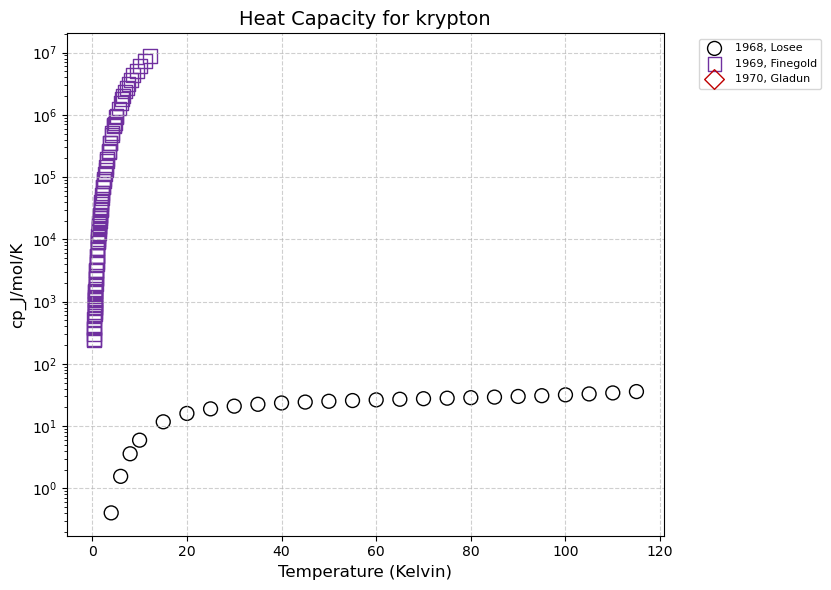

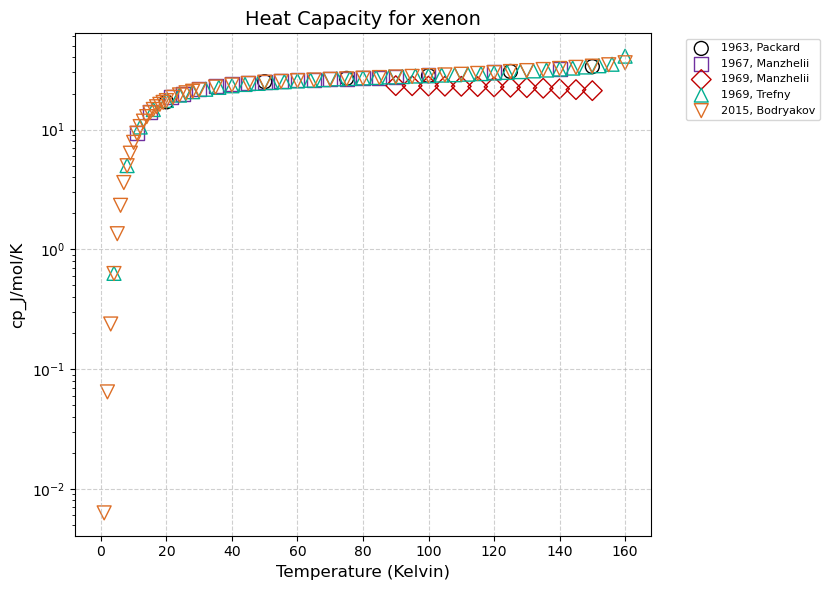

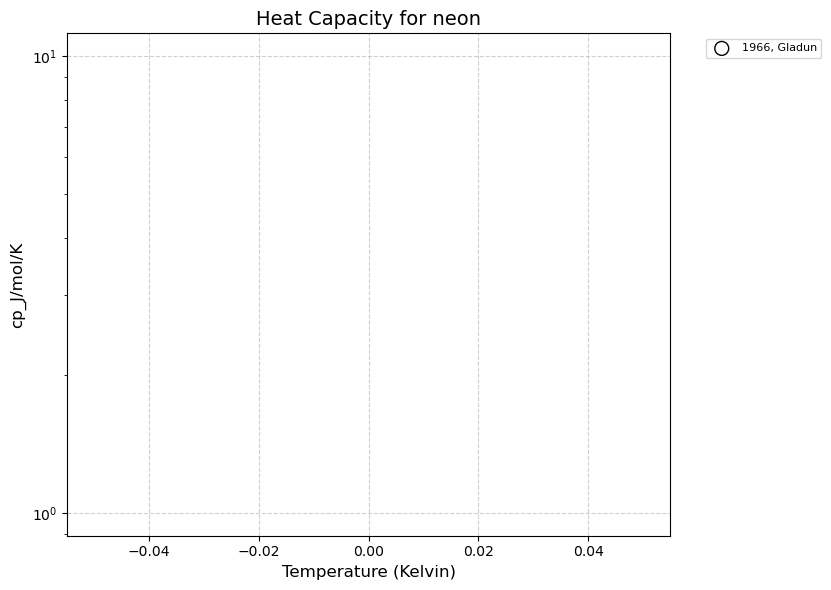

In [72]:
plot_heat_capacity_gas_data(heat_capacity_data, 'krypton')
plot_heat_capacity_gas_data(heat_capacity_data, 'xenon')
plot_heat_capacity_gas_data(heat_capacity_data, 'neon')

# Plots

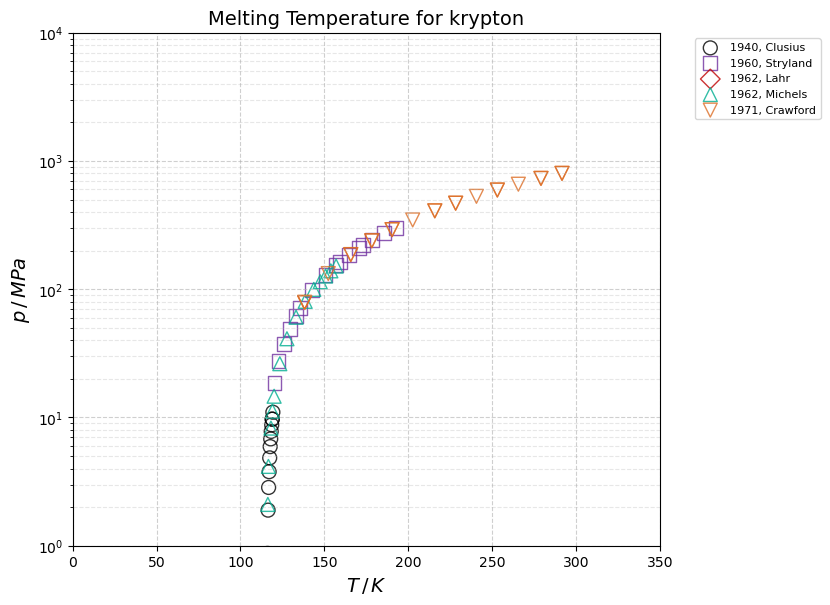

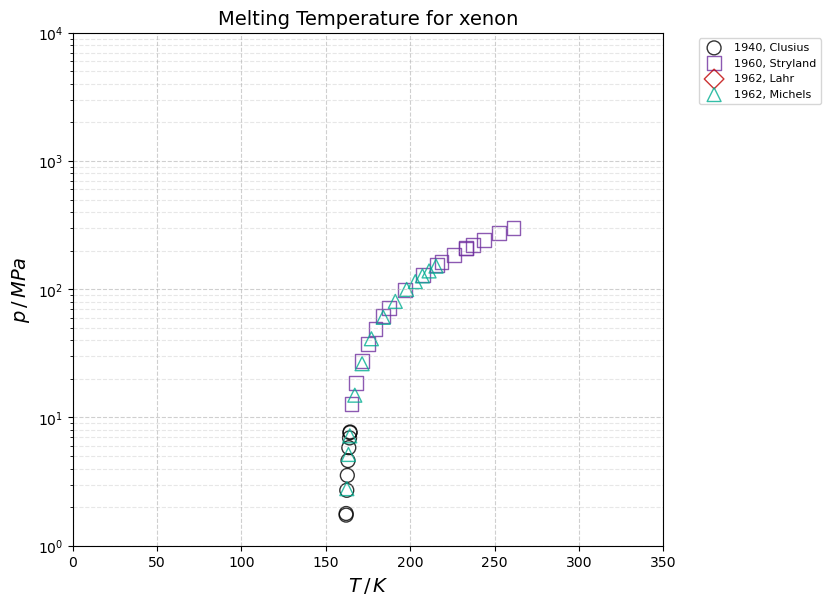

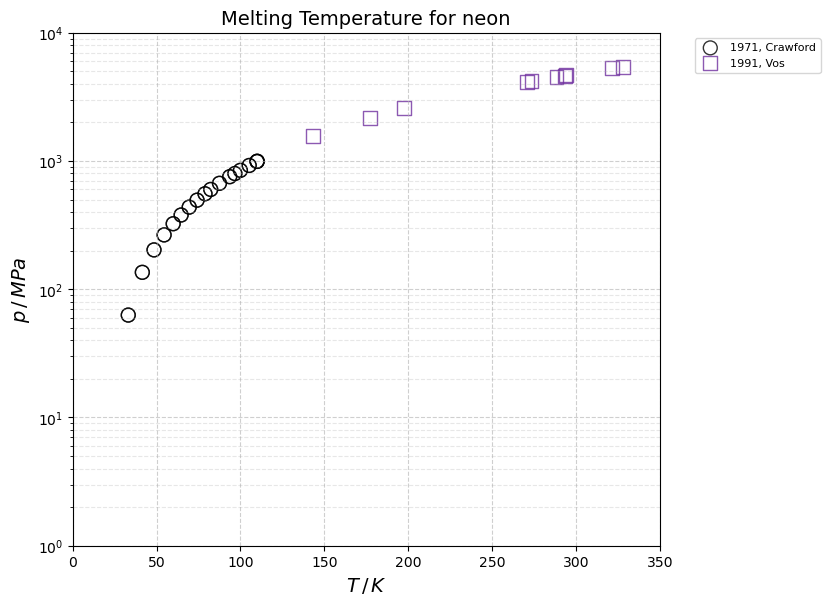

In [ ]:
# Individual plots for each gas
plot_melting_gas_data(melting_data, 'krypton')
plot_melting_gas_data(melting_data, 'xenon')
plot_melting_gas_data(melting_data, 'neon')

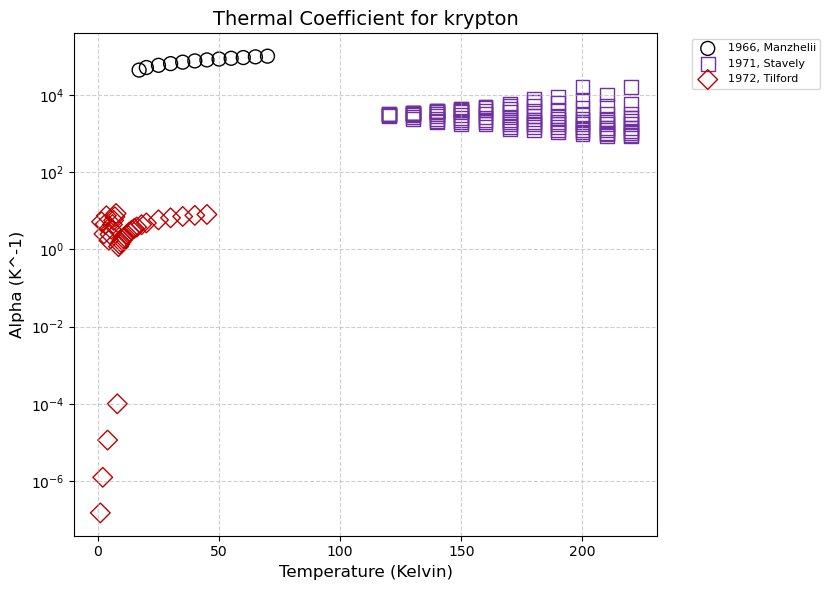

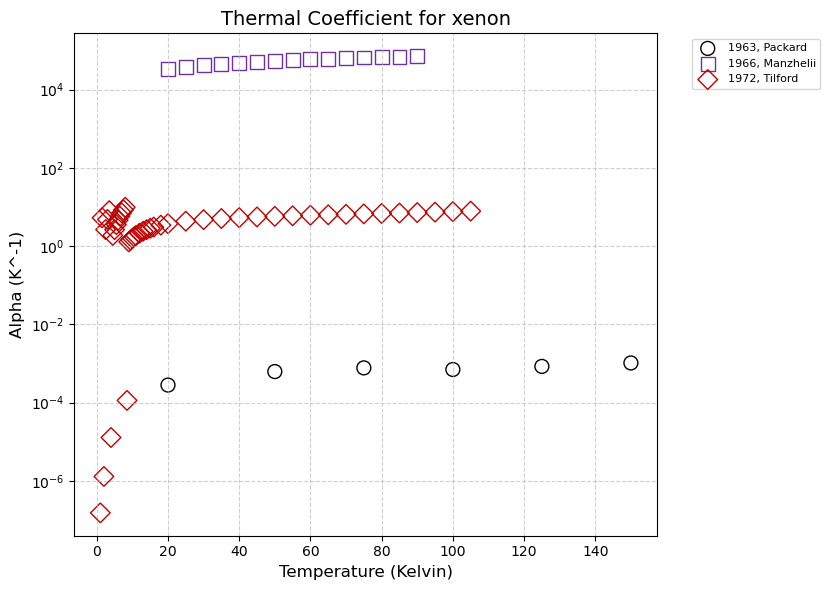

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


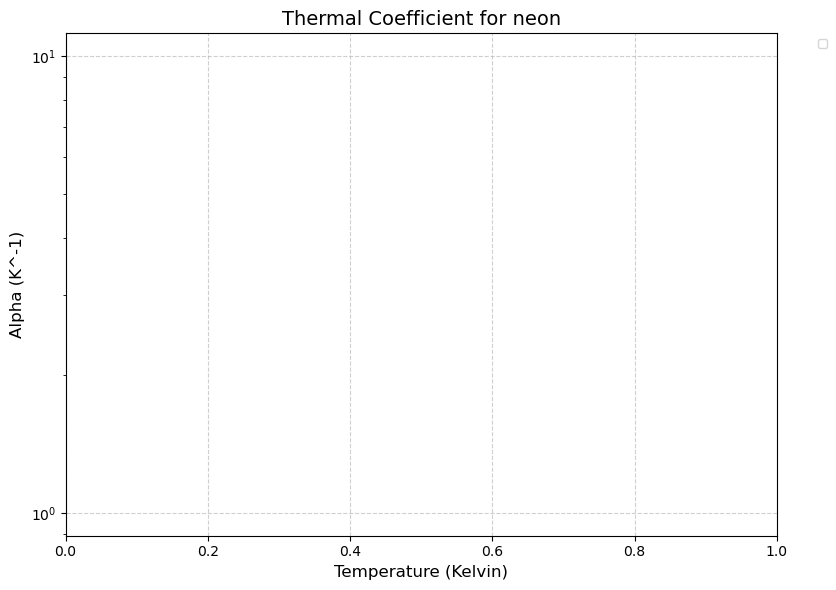

In [ ]:

# Individual plots for each gas
plot_thermal_coefficient_gas_data(krypton_data_thermal_coefficient, 'krypton')
plot_thermal_coefficient_gas_data(xenon_data_thermal_coefficient, 'xenon')
plot_thermal_coefficient_gas_data(neon_data_thermal_coefficient, 'neon')